### 시계열 데이터 선그래프 (7일 이동 평균선 그리기)
- 이동 평균선을 그리는 방법

# Lineplot from a wide-form dataset
* https://seaborn.pydata.org/examples/wide_data_lineplot.html

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
rs = np.random.RandomState(365)
rs

RandomState(MT19937) at 0x120476EB8

In [4]:
values = rs.randn(365, 4).cumsum(axis=0)
values

array([[ -2.14159895,  -1.23856596,   1.39294679,   0.53950231],
       [ -1.76274504,  -1.45289681,   0.74345461,  -2.07158943],
       [  0.72688886,  -1.24306808,   0.32987875,  -3.03094917],
       ...,
       [ 40.78279333,  14.96154129, -12.91381291,  10.50360701],
       [ 41.07376835,  13.95902742, -12.0379894 ,  10.90847636],
       [ 40.18591798,  13.869666  , -13.44694313,  10.71704547]])

In [6]:
pd.DataFrame(values).shape

(365, 4)

In [21]:
dates = pd.date_range("1 1 2016", periods=365, freq="D") # freq="D" 데이로, 365주기
dates

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-21', '2016-12-22', '2016-12-23', '2016-12-24',
               '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [12]:
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data.head(1)

A         B         C         D
2016-01-01 -2.141599 -1.238566  1.392947  0.539502

In [13]:
data.tail(1)

A          B          C          D
2016-12-30  40.185918  13.869666 -13.446943  10.717045

In [14]:
data = data.rolling(7).mean() # 1주일동안의 이동평균값 
data.head(14)

A         B         C         D
2016-01-01       NaN       NaN       NaN       NaN
2016-01-02       NaN       NaN       NaN       NaN
2016-01-03       NaN       NaN       NaN       NaN
2016-01-04       NaN       NaN       NaN       NaN
2016-01-05       NaN       NaN       NaN       NaN
2016-01-06       NaN       NaN       NaN       NaN
2016-01-07 -0.458300 -0.677791  0.851888 -1.946814
2016-01-08 -0.239556 -0.403172  0.745531 -2.504348
2016-01-09 -0.261204 -0.254974  0.798896 -2.610642
2016-01-10 -0.602155 -0.126817  0.942284 -2.381506
2016-01-11 -0.762539 -0.038982  1.077379 -2.300033
2016-01-12 -0.725814  0.399516  1.567837 -2.081189
2016-01-13 -0.880924  0.723558  1.854528 -2.269472
2016-01-14 -0.892647  0.909081  2.373457 -2.299502

In [15]:
data.tail(14)

A          B          C          D
2016-12-17  40.372286  14.756488 -14.727881  11.329401
2016-12-18  40.019334  14.994212 -14.693699  11.184410
2016-12-19  39.375075  15.016319 -14.379424  11.338507
2016-12-20  38.743908  15.251274 -14.043725  11.526092
2016-12-21  38.453403  15.438575 -13.651803  11.471229
2016-12-22  38.335901  15.672412 -13.417281  11.407427
2016-12-23  38.219439  15.965895 -13.057782  11.060059
2016-12-24  38.191991  16.228454 -12.743142  10.481270
2016-12-25  38.257600  16.220786 -12.660004   9.825187
2016-12-26  38.698745  16.181793 -12.785039   9.346538
2016-12-27  39.459673  16.207105 -12.889378   8.956668
2016-12-28  39.886961  16.112783 -13.009065   8.975601
2016-12-29  40.232831  15.907644 -12.845443   9.060119
2016-12-30  40.508511  15.527725 -13.059966   9.235144

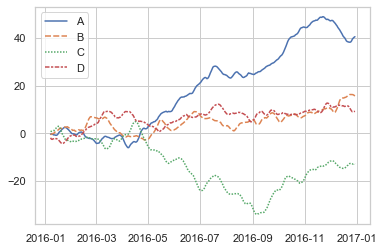

In [22]:
sns.lineplot(data=data)

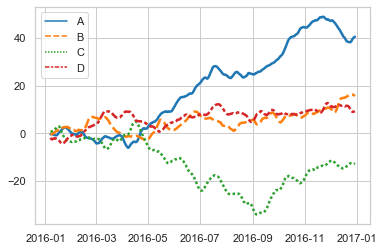

In [17]:
sns.lineplot(data=data, palette="tab10", linewidth=2.5) # palette 다른 색상